## 1. import libraries ##

In [8]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from matplotlib import pyplot as plt

## 2. import data ##

In [3]:
df=pd.read_csv('examscore.csv')
df.drop(df.columns[0],axis=1, inplace=True)
df.head()

,mechanics,vectors,algebra,analysis,statistics
0,77,82,67,67,81
1,63,78,80,70,81
2,75,73,71,66,81
3,55,72,63,70,68
4,63,63,65,70,63


In [4]:
# Barlett test
# from factor_analyzer import calculate_barlett_sphericity

chi_square_value, p_value = calculate_barlett_sphericity(df)
chi_square_value, p_value
# p-value가 작아야 요인분석에 적합한 데이터.

ImportError: cannot import name 'calculate_barlett_sphericity' from 'factor_analyzer' (C:\anaconda3\lib\site-packages\factor_analyzer\__init__.py)

In [5]:
# kmo 검정
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
kmo_model
# 0.8 이상이어야 우수

0.8260363079255291

In [6]:
# Build FactorAnalyzer Model
fa = FactorAnalyzer(method='principal', n_factors=2, rotation='varimax').fit(df)
# 요인적재량(Loadings) 
print('요인적재량(loadings):\n',pd.DataFrame(fa.loadings_).round(2))
# 공통성(Communalities) 
print('공통성(comunalities):\n', pd.DataFrame(fa.get_communalities()).round(2))
# 고유값(Eigenvalue)
ev,v=fa.get_eigenvalues()
print('고유값:\n', pd.DataFrame(ev).round(2))

요인적재량(loadings):
       0     1
0  0.19  0.88
1  0.35  0.78
2  0.76  0.49
3  0.84  0.27
4  0.86  0.19
공통성(comunalities):
       0
0  0.82
1  0.74
2  0.82
3  0.78
4  0.77
고유값:
       0
0  3.18
1  0.74
2  0.44
3  0.39
4  0.25


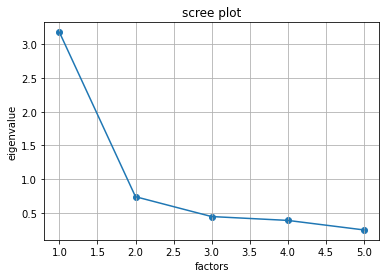

In [9]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('scree plot')
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()
# 그래프가 꺾이는 2,3중에서 선택

In [10]:
# model 결과값 보기 n_factors를 3으로도 놓고 해보기
fa.get_factor_variance()
result = pd.DataFrame(fa.get_factor_variance())
result.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
result
    

,0,1
SS Loadings,2.177346,1.743206
Proportion Var,0.435469,0.348641
Cumulative Var,0.435469,0.784110


In [11]:
# 탐색적 요인분석
efa_result = pd.DataFrame(fa.loadings_, index = df.columns)
efa_result
## 요인 0는 Analysis, Statistics에 대해 높은 요인 적재량을 가진다.
## (두 과목의 상관관계가 높다)
## 요인 1은 Mechanics, Vectors에 대해 높은 요인 적재량을 가진다.
## (+ 요인 0에서는 두 과목의 적재량이 낮다)
## 요인 0으로는 두 과목의 점수가 설명이 되며, 요인 1로는 다른 두 과목의 점수가 설명이 된다.


,0,1
mechanics,0.191037,0.882935
vectors,0.347039,0.784715
algebra,0.760004,0.490339
analysis,0.839370,0.266586
statistics,0.859225,0.190667
